### Q-learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

In [2]:
def eps_greedy_policy(env, Q, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        actions = list(env.P[state].keys()) 
        return random.choice(actions)
    else:
        return np.argmax(Q[state])


In [3]:
def generate_best_policy(env, Q):
    policy = { state: None for state in range(env.observation_space.n) }

    for state in range(env.observation_space.n):
        policy[state] = np.argmax(Q[state])

    return policy

In [4]:
def simulate_policy(env, Q, iterations):
    epoch_rewards = []

    policy = { state: None for state in range(env.observation_space.n) }

    for state in range(env.observation_space.n):
        policy[state] = np.argmax(Q[state])

    for i in range(iterations):
        env.reset()
        state = 0
        done = False

        total_reward = 0
        while not done:
            action = policy[state]
            
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            total_reward += reward
            state = next_state

        epoch_rewards.append(total_reward)
        

    return np.mean(epoch_rewards)

In [5]:
def q_learning(env, gamma, epsilon, alpha, iterations, _evaluation_step = 100):
    env.reset()

    Q = np.zeros((env.observation_space.n, env.action_space.n))

    train_rewards = []
    crt_rewards = []
    test_rewards = []

    for i in range(iterations):
        env.reset()
        state = 0

        done = False

        total_reward = 0

        while not done:
            action = eps_greedy_policy(env, Q, state, epsilon)

            next_state, reward, terminated, truncated, _ = env.step(action)
        
            done = terminated or truncated

            total_reward += reward
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state] - Q[state, action]))
            state = next_state

        if i % _evaluation_step == 0 and i != 0:
            test_rewards.append(simulate_policy(env, Q, iterations=_evaluation_step))
            train_rewards.append(np.mean(crt_rewards[-_evaluation_step:]))

        crt_rewards.append(total_reward)

    return train_rewards, test_rewards, crt_rewards

In [6]:
def sarsa(env, gamma, epsilon, alpha, iterations, _evaluation_step = 100):
    env.reset()

    Q = np.zeros((env.observation_space.n, env.action_space.n))

    train_rewards = []
    crt_rewards = []
    test_rewards = []

    for i in range(iterations):
        env.reset()
        state = 0

        done = False

        total_reward = 0

        action = eps_greedy_policy(env, Q, state, epsilon)
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = eps_greedy_policy(env, Q, next_state, epsilon)
           
            done = terminated or truncated

            total_reward += reward
            Q[state, action] =  Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] -  Q[state, action])
            state = next_state
            action = next_action

        if i % _evaluation_step == 0 and i != 0:
            test_rewards.append(simulate_policy(env, Q, iterations=_evaluation_step))
            train_rewards.append(np.mean(crt_rewards[-_evaluation_step:]))
            
        crt_rewards.append(total_reward)

    return train_rewards, test_rewards, crt_rewards

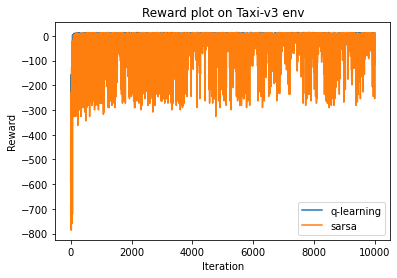

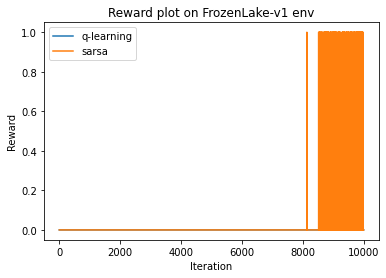

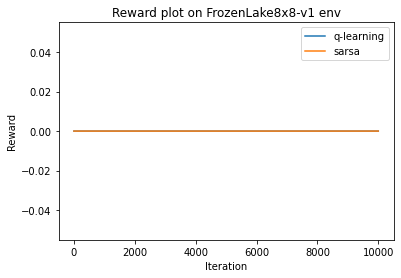

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["Taxi-v3", "FrozenLake-v1"]

for env_name in env_names:
    gamma_demo = 0.9
    epsilon_demo = 0.1
    alpha_demo = 0.5

    env = gym.make(env_name)

    q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)
    sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)

    plt.plot(q_reward, label="q-learning")
    plt.plot(sarsa_reward, label="sarsa")

    plt.xlabel("Iteration")
    plt.ylabel("Reward")

    plt.title("Reward plot on {} env".format(env_name))

    plt.legend()
    plt.show()

### Play training epoch plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["Taxi-v3", "FrozenLake-v1"]

for env_name in env_names:
    gamma_demo = 0.9
    epsilon_demo = 0.1
    alpha_demo = 0.5

    env = gym.make(env_name)

    q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)
    sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)

    plt.plot(q_tr, label="q-learning")
    plt.plot(sarsa_tr, label="sarsa")

    plt.xlabel("Iteration")
    plt.ylabel("Reward")

    plt.title("Reward plot on {} env".format(env_name))

    plt.legend()
    plt.show()

### Test replay epoch plots

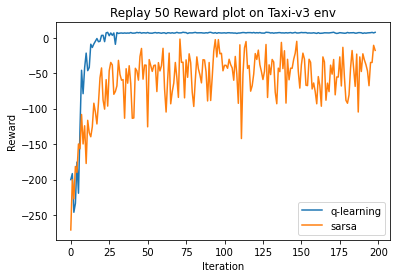

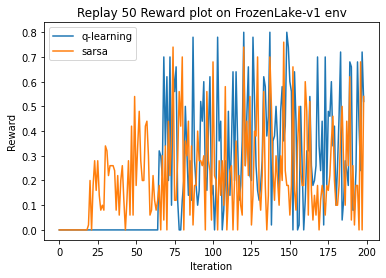

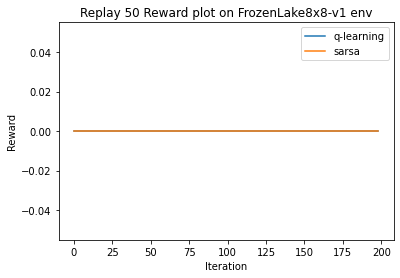

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["Taxi-v3", "FrozenLake-v1"]

for env_name in env_names:
    gamma_demo = 0.9
    epsilon_demo = 0.1
    alpha_demo = 0.5

    env = gym.make(env_name)

    q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)
    sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 10000, _evaluation_step=50)

    plt.plot(q_te, label="q-learning")
    plt.plot(sarsa_te, label="sarsa")

    plt.xlabel("Iteration")
    plt.ylabel("Reward")

    plt.title("Replay 50 Reward plot on {} env".format(env_name))

    plt.legend()
    plt.show()

### Compare alpha

/home/alex/.local/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


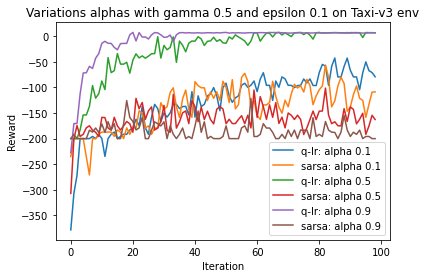

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["Taxi-v3", "FrozenLake-v1"]

gammas = [0.5, 0.9]
epsilons = [0.1, 0.5, 0.8]
alphas = [0.1, 0.5, 0.9]

for env_name in env_names:
    gamma_demo = 0.9
    epsilon_demo = 0.1
    alpha_demo = 0.5
    for gamma_demo in gammas:
        for epsilon_demo in epsilons:
            re_alpha = dict()
            for alpha_demo in alphas:
                env = gym.make(env_name)

                q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)
                sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)

                re_alpha[alpha_demo] = (q_te, sarsa_te)
            
            for alpha_demo in alphas:
                (q_te, sarsa_te) = re_alpha[alpha_demo]
                plt.plot(q_te, label="q-lr: alpha " + str(alpha_demo))
                plt.plot(sarsa_te, label="sarsa: alpha " + str(alpha_demo))

            plt.xlabel("Iteration")
            plt.ylabel("Reward")

            plt.title("Variations alphas with gamma {} and epsilon {} on {} env".format(gamma_demo, epsilon_demo, env_name))

            plt.legend()
            plt.show()

### Compare gamma

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["Taxi-v3", "FrozenLake-v1"]

gammas = [0.5, 0.9]
epsilons = [0.1, 0.5, 0.8]
alphas = [0.1, 0.5, 0.9]

for env_name in env_names:
    for alpha_demo in alphas:
        for epsilon_demo in epsilons:
            re_gamma = dict()
            for gamma_demo in gammas:
                env = gym.make(env_name)

                q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)
                sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)

                re_gamma[gamma_demo] = (q_te, sarsa_te)
            
            for gamma_demo in gammas:
                (q_te, sarsa_te) = re_gamma[gamma_demo]
                plt.plot(q_te, label="q-lr: gamma " + str(gamma_demo))
                plt.plot(sarsa_te, label="sarsa: gamma " + str(gamma_demo))

            plt.xlabel("Iteration")
            plt.ylabel("Reward")

            plt.title("Variations gammas with alpha {} and epsilon {} on {} env".format(alpha_demo, epsilon_demo, env_name))

            plt.legend()
            plt.show()

### Compare epsilon

/home/alex/.local/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


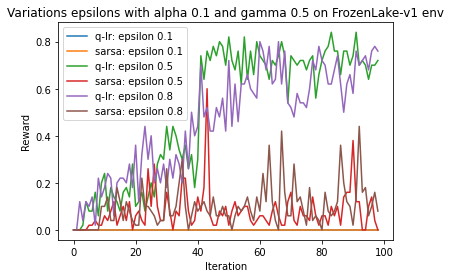

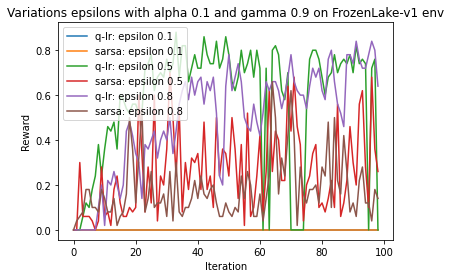

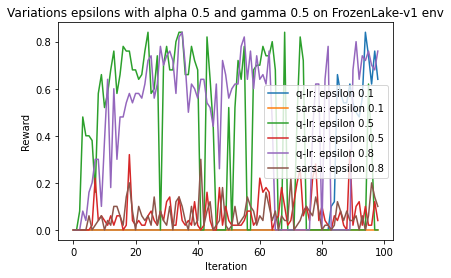

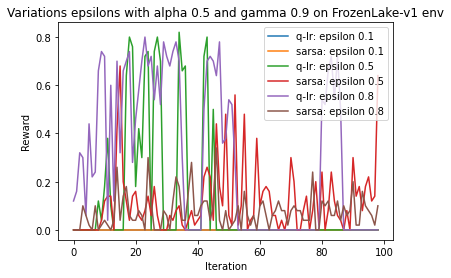

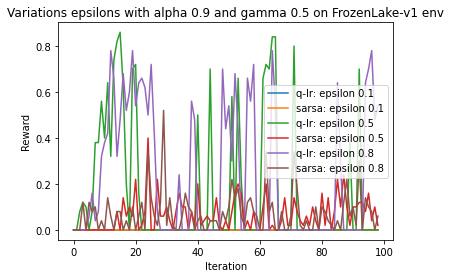

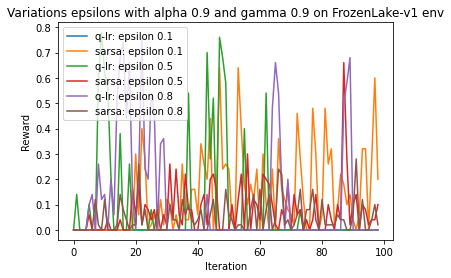

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import sys
import random
import pickle

random.seed(123)
env_names = ["FrozenLake-v1"]

gammas = [0.5, 0.9]
epsilons = [0.1, 0.5, 0.8]
alphas = [0.1, 0.5, 0.9]

for env_name in env_names:
    for alpha_demo in alphas:
        for gamma_demo in gammas:
            re_epsilon = dict()
            for epsilon_demo in epsilons:
                env = gym.make(env_name)

                q_tr, q_te, q_reward = q_learning(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)
                sarsa_tr, sarsa_te, sarsa_reward = sarsa(env, gamma_demo, epsilon_demo, alpha_demo, 5000, _evaluation_step=50)

                re_epsilon[epsilon_demo] = (q_te, sarsa_te)
            
            for epsilon_demo in epsilons:
                (q_te, sarsa_te) = re_epsilon[epsilon_demo]
                plt.plot(q_te, label="q-lr: epsilon " + str(epsilon_demo))
                plt.plot(sarsa_te, label="sarsa: epsilon " + str(epsilon_demo))

            plt.xlabel("Iteration")
            plt.ylabel("Reward")

            plt.title("Variations epsilons with alpha {} and gamma {} on {} env".format(alpha_demo, gamma_demo, env_name))

            plt.legend()
            plt.show()